# Homework 4

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *Dimensional Fund Advisors*

*Names:* Dylan Masters, Eduardo Scheffer,  Gabrielle Pan, Niall Mandal

***

# Section 1: DFA's Strategy

> **Note:** This section is not graded, but you should review these concepts and be prepared to discuss them.

### 1. Investment Philosophy

1. **DFA’s Belief:** In 100 words or less, describe DFA’s belief about how to find premium in the market.
2. **Strategy Dependency:** To what degree does their strategy rely on:
   - Individual equity analysis?
   - Macroeconomic fundamentals?
   - Efficient markets?
3. **Active or Passive:** Are DFA’s funds active or passive?
4. **Stock Types:** Define "value" and "growth" stocks according to DFA.

<span style="color:red">__*Answer*__ </span>

__*1.*__ DFA believed that investment risk premia come from bearing specific types of risk. Rather than depending solely on market risk (beta), DFA’s philosophy was built initially on the academic research by Rolf Banz, which asserted that small/mirco-cap equities provided additional risk premium, and later on the research of Fama and French (1992, 1993), which proposed a three-factorasset pricing model that added two  new portfolios to the market portfolio: “high-minus-low” (HML) for book-to-market equity and “small-minus-big” (SMB) for market capitalization. The HML portfolio, or Value factor, is built upon the idea that cheaper stocks may be distressed and thus carry a risk premium. The SMB portfolio, or Size factor, reflects the higher risk associated with smaller companies, which justifies a premium for holding smaller-cap stocks. Built upon the belief of efficient markets, DFA believed that these premiums were persistent and could be captured through a systematic, rules-based approach to investing.


__*2.*__ DFA's strategy relies primarily on their belief in the efficiency of markets, which means that all available information has already been incorporated into market prices, and this, no one can consistenly overperform the overall market for long periods of time by additional analysi. Thus, the strategy depends on focusing on the right sources of risk to deliver the desired risk premim, and, thus, the strategy dependence on the following is:
    - Individual equity analysis: LOW to NONE
    - Macroeconomic fundamentals: LOW to NONE
    - Efficient markets: HIGH

__*3.*__  DFA follows strategies similar to index funds but enhances them with active management. This approach places them in a unique position, blending elements of both index funds and active management.

__*4.*__  Value stocks are stock strading at a low price relative to a measure of fundamental value such as book equity. Growth stocks are stocks trading at a low price relative to a measure of fundamental value such as book equity.

### 2. Challenges for DFA’s View

1. **1980s Challenge:** What challenge did DFA's model face in the 1980s?
2. **1990s Challenge:** What challenge did DFA's model face in the 1990s?

<span style="color:red">__*Answer*__ </span>

__*1.*__ Small capitalization stocks were passing through a period of poor performance compared to large capitalization stocks because of a deep recession that the US entered in early 1980. As the decade went through, the recession continued to drag on the small companies, even long after the economy recovered. Since the reward for bewaring the "size factor" risk awas unattractive and Small Caps was one of the largest DFA strategies, the asset manager suffered.

__*2.*__ Value stocks were considerably lagging behind growth stocks, specially high-tech growth mega caps, which was the exact type of stocks DFA avoided, so again, the "value factor" was unattractive while being one of DFA's focus.

### 3. The Market

1. **Market Composition:** Based on Exhibit 3, how many firms are "large cap," and what percentage of market value do they represent?
2. **Value Factor:** Why might an investor still be interested in the U.S. value factor, even though it underperformed in the long term except for 1963-1981?


<span style="color:red">__*Answer*__ </span>

__*1.*__  Large Caps: 207 companies, representing 70% of the overall market.

__*2.*__  As indicated by Fama and French, it is possible that there are risk factors other than market beta, which are allow investors to obtain returns by assuming risk other than market risk. The "value factor" may represent one of these risks even after a period of underperforming because in the long run, it still overperforms growth. Also, the factor has low correlation to other factors, which can add diverifying effect on the portfolio.

***

# Section 2: The Factors

> **Data Source:** Use the data in `dfa_analysis_data.xlsx`, specifically the **MKT** column for excess market returns.

### 1. Factor Performance Statistics

Calculate and report the following statistics for each of the three subsamples:
   - Mean
   - Volatility
   - Sharpe Ratio
   - VaR (0.05)

#### Subsamples
- Beginning - 1980
- 1981 - 2001
- 2002 - End

In [1]:
# Import Libraries:
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 30)


import os
import sys

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)

import utils.portfolio_management_functions as pm

In [2]:
# Check data in the file (sheets, columns, data):
INFILE = "data/dfa_analysis_data.xlsx"
try:
    pm.read_excel_default(INFILE, print_sheets = True)
except FileNotFoundError as e:
    print(f'{e}.\nCheck file in {parent_path}')
    

Sheet name: descriptions
Columns: Unnamed: 0, Name, Unit, Construction, Description
  Unnamed: 0    Name           Unit         Construction                                        Description
0     Mkt-RF  Market  Excess Return  Market-cap-weighted                                        US Equities
1        SMB    Size  Excess Return      Small Minus Big             Long small stocks and short big stocks
2        HML   Value  Excess Return       High Minus Low  Long value (high book-to-market) stocks and sh...
----------------------------------------------------------------------


Sheet name: factors
Columns: Date, Mkt-RF, SMB, HML, RF
        Date  Mkt-RF     SMB     HML     RF
0 1926-07-31  0.0296 -0.0256 -0.0243 0.0022
1 1926-08-31  0.0264 -0.0117  0.0382 0.0025
2 1926-09-30  0.0036 -0.0140  0.0013 0.0023
----------------------------------------------------------------------


Sheet name: portfolios (total returns)
Columns: Date, SMALL LoBM, ME1 BM2, ME1 BM3, ME1 BM4, SMALL HiBM, M

In [3]:
# Import data from the file:
description = pd.read_excel(INFILE, sheet_name='descriptions',index_col=0)
factors_returns = pd.read_excel(INFILE, sheet_name='factors',index_col=0)
portfolios_total_returns = pd.read_excel(INFILE, sheet_name='portfolios (total returns)',index_col=0)

risk_free_returns = factors_returns['RF']
factors_returns = factors_returns.drop(columns=['RF'])

display(description)

,Name,Unit,Construction,Description
Mkt-RF,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RF,Risk-free rate,Total Return,Tbills,NaN


In [4]:
SUBSAMPLES = [(factors_returns.index[0].strftime('%Y-%m-%d'), '1980-12-31'),
              ('1981-01-01', '2001-12-31'),
              ('2002-01-01', factors_returns.index[-1].strftime('%Y-%m-%d'))]

for i, (start_date, end_date) in enumerate(SUBSAMPLES):
    print(f'\n\n\nSubsample {i+1}: {start_date} - {end_date}\n')
    factors_subsample = factors_returns.loc[start_date:end_date]
    
    # Calculate the factor returns statistics:
    factor_stats = pm.calc_returns_statistics(factors_subsample,
                                       provided_excess_returns=True,
                                       annual_factor=12,
                                       var_quantile = 0.05,
                                       keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe',
                                                     'Annualized Historical VaR (5.0%)'])
    display(factor_stats)
# Calculate the portfolio returns statistics:
#calc_returns_statistics




Subsample 1: 1926-07-31 - 1980-12-31



,Annualized Mean,Annualized Vol,Annualized Sharpe,Annualized Historical VaR (5.0%)
Mkt-RF,0.0811,0.2051,0.3957,-0.2909
SMB,0.0340,0.1146,0.2966,-0.1503
HML,0.0495,0.1338,0.3697,-0.1486





Subsample 2: 1981-01-01 - 2001-12-31



,Annualized Mean,Annualized Vol,Annualized Sharpe,Annualized Historical VaR (5.0%)
Mkt-RF,0.0773,0.1574,0.4908,-0.2236
SMB,-0.0009,0.1183,-0.0073,-0.1611
HML,0.0638,0.1112,0.5736,-0.1448





Subsample 3: 2002-01-01 - 2024-08-31



,Annualized Mean,Annualized Vol,Annualized Sharpe,Annualized Historical VaR (5.0%)
Mkt-RF,0.0895,0.1546,0.5787,-0.2727
SMB,0.0110,0.0889,0.1238,-0.1353
HML,0.0005,0.1073,0.0050,-0.1429


### 2. Factor Premium Analysis

1. **Premium Evaluation:** Does each factor have a premium in each subsample?
2. **Size Factor Premium:** Does the size factor's premium decrease after 1980?
3. **Value Factor Premium:** Does the value factor’s premium decrease during the 1990s?
4. **Post-2002 Performance:** How have the factors performed since 2002?


<span style="color:red">__*Answer*__ </span>

__*1.*__ No, in 1981-2000, SMB factor had negative average excess returns. In  2001-2024, HML also had a zero average excess returns.

__*2.*__  The premium of the size factor (SMB) fell after 1980, and slightly rose again from 2002 and on. This reflects the case narrative, in which small stocks suffered as a result of the 1980s recession. It is important to note that Fama and French showed that this underperformance was more the result of poor fundamentals in smaller firms rather than them having "fallen out of favor" in the market. This seems to reinforce the notion that smaller stocks are riskier and should thus require a premium.

__*3.*__  The premium of the value factor (HML) seemed to expand during the 1981 to 2001 period. However, this premium fell drastically, coinciding with the "dot com bubble". Since 2002, the excess returns have been almost negligible.

__*4.*__  Since 2001, the market factor performed well (8.95% average excess returns), while the size factor has been positive (but very modest) and the value factor has been very close to zero. Put otherwise, small cap has "outperformed" large cap and growth has performed equally as well as has value.

### 3. Factor Correlation Analysis

1. **Correlation Matrix:** Report the correlation matrix for the three factors. Comment on whether the construction method succeeded in keeping correlations low.


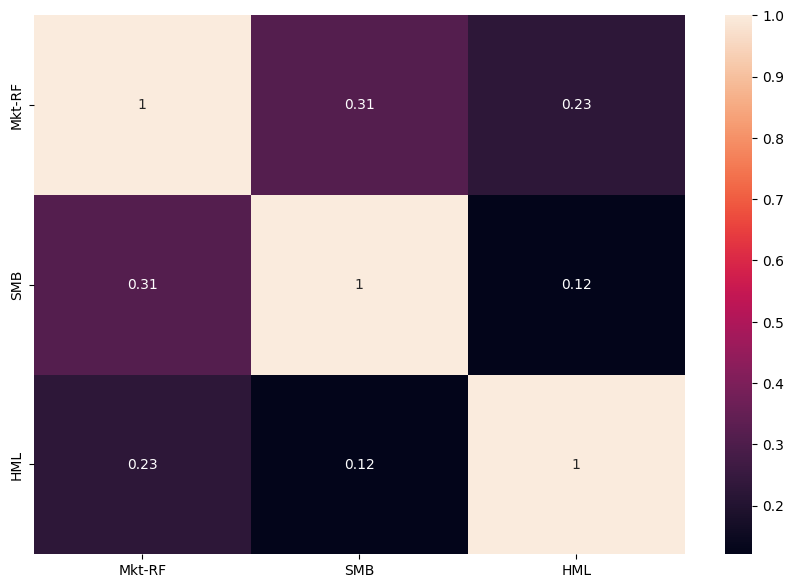

In [5]:
pm.calc_correlations(factors_returns, print_highest_lowest=False)

<span style="color:red">__*Answer*__ </span>

- The factor model construction succeeded in keeping correlations low.

### 4. Cumulative Returns Plot

1. **1981-2001 Plot:** Plot the cumulative returns of the three factors.
2. **2002-Present Plot:** Plot the cumulative returns of the three factors.
3. **Factor Value Analysis:** Were all three factors valuable during 1981-2001 and post-2001? Would you recommend DFA emphasize all three?


Comparison between Mkt-RF and Equal Weight (Mkt-RF, SMB, HML) in 1981 - 2001:



,Annualized Mean,Annualized Vol,Annualized Sharpe
Mkt-RF,0.0773,0.1574,0.4908
Equal Weights Portfolio,0.0467,0.0546,0.8551



Comparison between Mkt-RF and Equal Weight (Mkt-RF, SMB, HML) in 2002 - 2024:



,Annualized Mean,Annualized Vol,Annualized Sharpe
Mkt-RF,0.0895,0.1546,0.5787
Equal Weights Portfolio,0.0337,0.0806,0.4179


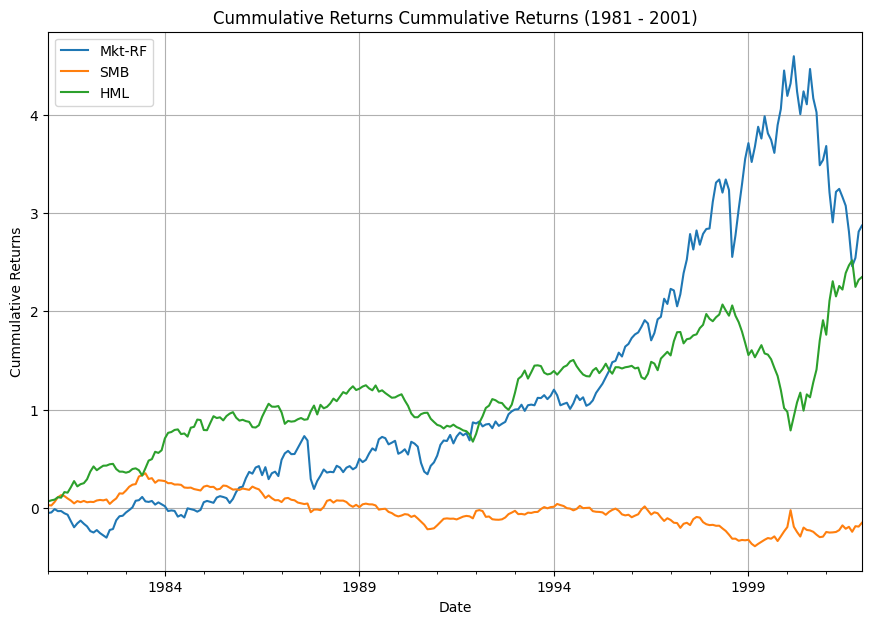

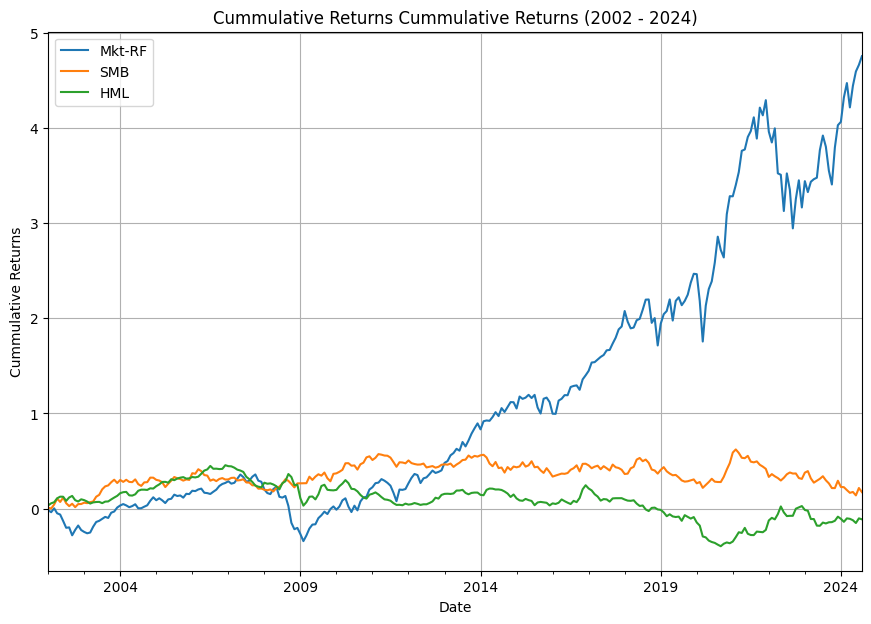

In [6]:
for i, (start_date, end_date) in enumerate(SUBSAMPLES[1:]):
    factors_subsample = factors_returns.loc[start_date:end_date]
    pm.calc_cummulative_returns(factors_subsample, name = f'Cummulative Returns ({start_date[:4]} - {end_date[:4]})')
    equal_weights_returns = pm.calc_equal_weights_port(factors_subsample[['Mkt-RF', 'SMB', 'HML']], annual_factor=12, return_port_returns=True)
    returns_stats = pm.calc_returns_statistics(returns=[factors_subsample['Mkt-RF'], equal_weights_returns.iloc[:,0]],
                               annual_factor = 12,
                               provided_excess_returns=True,
                               tail_risks=True,
                               keep_columns = ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
    
    print(f"Comparison between Mkt-RF and Equal Weight (Mkt-RF, SMB, HML) in {start_date[:4]} - {end_date[:4]}:\n")
    display(returns_stats)
    print()
    

<span style="color:red">__*Answer*__ </span>

- Based only on the cummulative plots, it appears that the size factor was not valuable during 1981-2002, and both the value and size factors were not valuable during 2002-2024, so we would recommend DFA to emphasize more the market factor.
- However, when looking at the sharpe ratio of only the Market factor vs an equal-weight portfolio of all 3 factors, the sharpe ratio is actually better for the equal weight portfolio during 1981-2002.

***

# Section 3: CAPM

> **Data:** Use the **PORTFOLIOS** data (monthly total return data) and **Risk-Free rate** from the factors tab for conversions.

### 1. Portfolio Summary Statistics

1. Convert total returns to excess returns using the Risk-Free rate.
2. Calculate the following annualized statistics:
   - Mean
   - Volatility
   - Sharpe Ratio
   - VaR (0.05)

#### Question:
- Can differences in mean excess returns be explained by differences in volatilities or VaR (0.05) statistics?


In [7]:
# Update the data to start from 1981:
factors_returns = factors_returns.loc['1981':]
risk_free_returns = risk_free_returns.loc['1981':]
portfolios_total_returns = portfolios_total_returns.loc['1981':]

In [8]:
portfolios_returns = pd.merge(portfolios_total_returns, risk_free_returns, how='inner', left_index=True, right_index=True)
portfolios_returns = portfolios_returns.apply(lambda x: x - portfolios_returns['RF']).drop(columns=['RF'])

portfolios_returns_stats = pm.calc_returns_statistics(returns=portfolios_returns,
                                   annual_factor=12,
                                   provided_excess_returns=False,
                                   rf=risk_free_returns, 
                                   var_quantile = 0.05,
                                   keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe','Annualized Historical VaR (5.0%)'])

display(portfolios_returns_stats)

,Annualized Mean,Annualized Vol,Annualized Sharpe,Annualized Historical VaR (5.0%)
SMALL LoBM,0.0067,0.2738,-0.1142,-0.4367
ME1 BM2,0.0887,0.2364,0.2147,-0.3282
ME1 BM3,0.0920,0.2013,0.2687,-0.2987
ME1 BM4,0.1160,0.1943,0.4019,-0.2666
SMALL HiBM,0.1278,0.2100,0.4281,-0.3067
ME2 BM1,0.0589,0.2452,0.0854,-0.3606
ME2 BM2,0.1005,0.2055,0.3045,-0.2967
ME2 BM3,0.1059,0.1858,0.3661,-0.2719
ME2 BM4,0.1088,0.1821,0.3894,-0.2637
ME2 BM5,0.1160,0.2156,0.3621,-0.3339


In [9]:

print('\n Regression of Annualized Mean on Annualized Vol and Historical VaR (5.0%)')
port_annualized_mean_returns = portfolios_returns_stats['Annualized Mean'].copy()
vol_var_regressors = portfolios_returns_stats[['Annualized Vol', 'Annualized Historical VaR (5.0%)']]
pm.calc_cross_section_regression(Y=port_annualized_mean_returns, X=vol_var_regressors, intercept=True)



 Regression of Annualized Mean on Annualized Vol and Historical VaR (5.0%)


,Annualized Mean
R-Squared,0.4271
Observed Mean,0.0939
Observed Std Dev,0.0244
Intercept,0.1547
P-Value (Intercept),0.0000
Lambda (Annualized Vol),0.9331
P-Value (Annualized Vol),0.0606
Lambda (Annualized Historical VaR (5.0%)),0.8428
P-Value (Annualized Historical VaR (5.0%)),0.0078


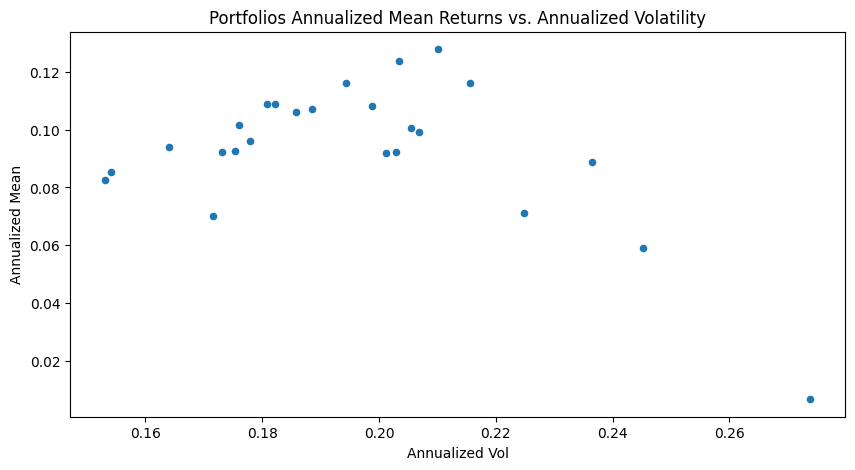

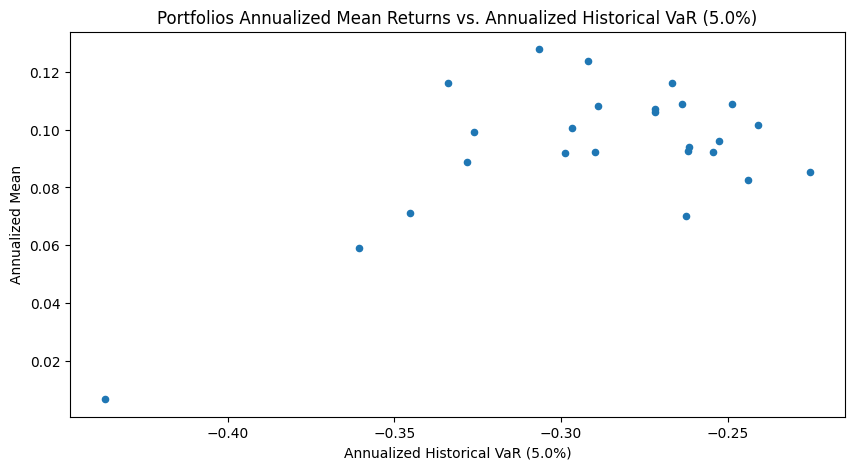

In [10]:
portfolios_returns_stats[['Annualized Mean', 'Annualized Vol']].plot(kind='scatter', x='Annualized Vol', y='Annualized Mean', figsize=(10, 5), title='Portfolios Annualized Mean Returns vs. Annualized Volatility')
portfolios_returns_stats[['Annualized Mean', 'Annualized Historical VaR (5.0%)']].plot(kind='scatter', x='Annualized Historical VaR (5.0%)', y='Annualized Mean', figsize=(10, 5), title='Portfolios Annualized Mean Returns vs. Annualized Historical VaR (5.0%)')
plt.show()

<span style="color:red">__*Answer*__ </span>

- The above scatter plots do not show much of a relationship between mean excess returns and volatility and between mean excess returns and Historical Var to explain the returns. 

- In fact, when performing a cross-sectionalregression of the returns on the volatilities and VaR, we notice that the differences in Annualized Vol and Annualized Historical VaR (5.0%) are not sufficient to explain variation in the annualized mean return of the portfolios, so they are not a good measure of risk:
    - The RSE is almost equal to the standard deviation of the portfolio mean returns, the p-values of the volatilities and VaR are not significant at % significance level, and the R-Squared is low (15.67%)
    - Additionally, the scatter plots show no clear relationship between the mean excess returns and the volatilities or VaR (5.0%) statistics.

### 2. CAPM Regression

1. **Time-Series Regression:** Run the CAPM regression for each portfolio and report the betas and alphas.
2. **MAE Calculation:** Calculate the mean-absolute-error (MAE) of the CA
   - **Question:** What would we expect of MAE if CAPM were true?

3. **CAPM Performance Metrics:**
   - Report estimated beta, Treynor Ratio, alpha, and Information Ratio for each regression.

4. **CAPM Hypothesis Check:**
   - What would be true for the Treynor Ratios, alphas, and Information Ratios if CAPM were correct?


In [11]:
# Time-Series CAPM Regression Metrics:
capm_ts_regression_summary = pm.calc_regression(Y=portfolios_returns,
                   X=factors_returns['Mkt-RF'],
                   intercept=True,
                   annual_factor=12,
                   tracking_error=False,
                   information_ratio=True)

capm_ts_regression_summary.drop(columns=['Alpha', 'Information Ratio'], inplace=True)

# Calculate the Treynor Ratio:
capm_ts_regression_summary = capm_ts_regression_summary.assign(Annualized_Treynor_Ratio = capm_ts_regression_summary['Observed Mean'] / capm_ts_regression_summary['Beta (Mkt-RF)'] * 12)
display(capm_ts_regression_summary)

,R-Squared,Observed Mean,Observed Std Dev,Annualized Alpha,P-Value (Alpha),Beta (Mkt-RF),P-Value (Mkt-RF),Annualized Information Ratio,Annualized_Treynor_Ratio
SMALL LoBM,0.5961,0.0006,0.0790,-0.1067,0.0001,1.3564,0.0000,-0.6134,0.0049
ME1 BM2,0.5905,0.0074,0.0682,-0.0088,0.7053,1.1657,0.0000,-0.0580,0.0761
ME1 BM3,0.6550,0.0077,0.0581,0.0046,0.7989,1.0452,0.0000,0.0391,0.0880
ME1 BM4,0.6085,0.0097,0.0561,0.0347,0.0632,0.9725,0.0000,0.2854,0.1193
SMALL HiBM,0.5450,0.0107,0.0606,0.0447,0.0403,0.9950,0.0000,0.3151,0.1285
ME2 BM1,0.7240,0.0049,0.0708,-0.0530,0.0074,1.3386,0.0000,-0.4119,0.0440
ME2 BM2,0.7405,0.0084,0.0593,0.0056,0.7259,1.1349,0.0000,0.0538,0.0886
ME2 BM3,0.7445,0.0088,0.0536,0.0199,0.1664,1.0286,0.0000,0.2124,0.1030
ME2 BM4,0.6957,0.0091,0.0526,0.0273,0.0763,0.9747,0.0000,0.2722,0.1117
ME2 BM5,0.6487,0.0097,0.0622,0.0228,0.2445,1.1144,0.0000,0.1786,0.1041


In [12]:
# Calculate the Mean Absolute Error (MAE) of the Annualized Alpha:
mae = capm_ts_regression_summary['Annualized Alpha'].abs().mean()
print(f'Mean Absolute Error (MAE) of the CAPM Annualized Alpha: {mae:.4f}')

# Calculate the Market Risk Premium:
expected_risk_premium_mkt = factors_returns['Mkt-RF'].mean() *12  # Expected Annualized Market Risk Premium (slope)
print(f'Annualized Expected Market Risk Premium (Mkt-RF): {expected_risk_premium_mkt:.4f}')

Mean Absolute Error (MAE) of the CAPM Annualized Alpha: 0.0224
Annualized Expected Market Risk Premium (Mkt-RF): 0.0836


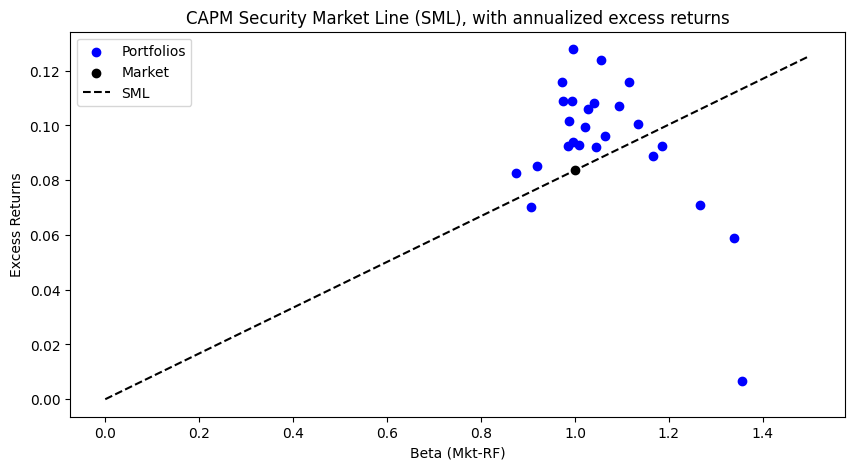

In [13]:
# Plot the Security Market Line (SML):

betas = capm_ts_regression_summary['Beta (Mkt-RF)'] # Betas of the portfolios
excess_returns = capm_ts_regression_summary['Observed Mean'] *12 # Excess returns of the portfolios

plt.figure(figsize=(10, 5))
plt.scatter(betas, excess_returns, label='Portfolios', color='blue')
plt.scatter(1, expected_risk_premium_mkt, label='Market', color='black')

# plot a line going through the origin, the market point and extending to the right:
plt.plot([0, 1.5], [0, 1.5*expected_risk_premium_mkt], color='black', linestyle='--', label='SML')

plt.xlabel('Beta (Mkt-RF)')
plt.ylabel('Excess Returns')
plt.legend()
plt.title('CAPM Security Market Line (SML), with annualized excess returns')
plt.show()

<span style="color:red">__*Answer*__ </span>

If CAPM were true:

2. Alphas would also be equal to zero, which in turn would make the Information Ratio zero as well as the MAE, matching the SML perfectly.

4. The Treynor Ratios would necessarily be constant and equal to the expected market premium (0.0836), which is the slope of the SML.

The results show that CAPM do not hold. The Treynor Ratios are not constant, the alphas are not zero, the Information Ratios are not zero and the MAE is not zero (0.0224). This is consistent with the scatter plots, which show that the portfolios do not lie on the SML.

### 3. Cross-Sectional Estimation

1. Run the regression \( E[r̃i] = η + β_{i,m} \lambda_m + υ \).
2. **Regression Statistics:**
   - R-squared
   - Intercept (η)
   - Regression Coefficient (λm)
3. **Question:** What values would these statistics have if CAPM held true?


In [14]:
portfolio_betas = capm_ts_regression_summary['Beta (Mkt-RF)'] # Beta of the portfolios (25 data points)
port_annualized_mean_returns = portfolios_returns.mean() * 12 # Mean excess returns of the portfolios (25 data points)
cross_section_capm_summary = pm.calc_cross_section_regression(Y=port_annualized_mean_returns,
                                 X=portfolio_betas,
                                 intercept=True,
                                 rse_mae=True,
                                 regression_name='Annualized Mean Returns ~ Beta (Mkt-RF)')

display(cross_section_capm_summary)

,Annualized Mean Returns ~ Beta (Mkt-RF)
R-Squared,0.3006
Observed Mean,0.0939
Observed Std Dev,0.0244
MAE,0.0147
RSE,0.0209
Intercept,0.2086
P-Value (Intercept),0.0000
Lambda (Beta (Mkt-RF)),-0.1082
P-Value (Beta (Mkt-RF)),0.0045


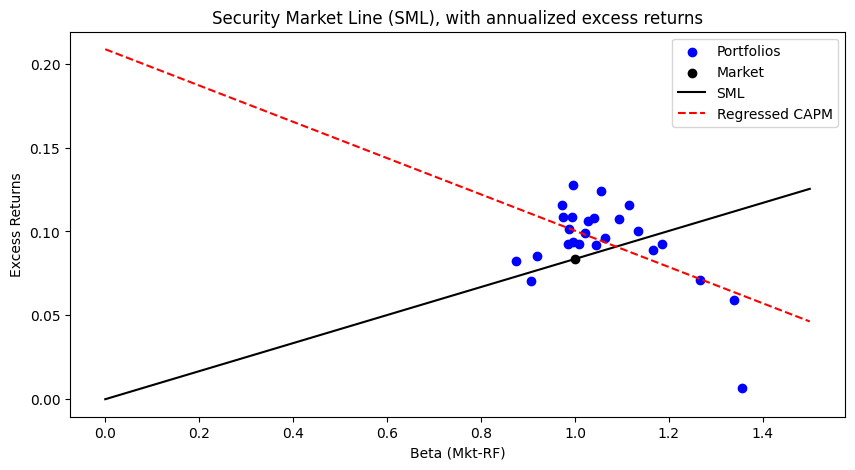

In [15]:
# Plot the Security Market Line (SML):

betas = capm_ts_regression_summary['Beta (Mkt-RF)'] # Betas of the portfolios
excess_returns = capm_ts_regression_summary['Observed Mean'] *12 # Excess returns of the portfolios

plt.figure(figsize=(10, 5))
plt.scatter(betas, excess_returns, label='Portfolios', color='blue')
plt.scatter(1, expected_risk_premium_mkt, label='Market', color='black')

# Plot a line going through the origin, the market point and extending to the right:
plt.plot([0, 1.5], [0, 1.5*expected_risk_premium_mkt], color='black', linestyle='-', label='SML')

# Plot the regressed line:
slope_regressed = cross_section_capm_summary.loc['Lambda (Beta (Mkt-RF))'].values[0]
intercept_regressed = cross_section_capm_summary.loc['Intercept'].values[0]
plt.plot([0, 1.5], [intercept_regressed, 1.5*slope_regressed + intercept_regressed], color='red', linestyle='--', label='Regressed CAPM')

plt.xlabel('Beta (Mkt-RF)')
plt.ylabel('Excess Returns')
plt.legend()
plt.title('Security Market Line (SML), with annualized excess returns')
plt.show()

In [16]:
# Summarizing previous answers:

columns = ["Expected", "Time-Series", "Cross-Section"]
indexes = ["Mkt-RF Beta",
           "Intercept",
           "Annualized MAE", 
           "R-Squared",
           "Average Annualized Treynor Ratio",
           "Std Dev of Annualized Treynor Ratio"]

test_statistics = pd.DataFrame(index=indexes, columns=columns)

test_statistics.loc["Mkt-RF Beta", "Expected"] = expected_risk_premium_mkt
test_statistics.loc["Mkt-RF Beta", "Time-Series"] = capm_ts_regression_summary['Annualized_Treynor_Ratio'].mean()
test_statistics.loc["Mkt-RF Beta", "Cross-Section"] = slope_regressed

test_statistics.loc["Intercept", "Expected"] = 0
test_statistics.loc["Intercept", "Time-Series"] = "-"
test_statistics.loc["Intercept", "Cross-Section"] = cross_section_capm_summary.loc['Intercept'].values[0]

test_statistics.loc["Annualized MAE", "Expected"] = 0
test_statistics.loc["Annualized MAE", "Time-Series"] = capm_ts_regression_summary['Annualized Alpha'].abs().mean()
test_statistics.loc["Annualized MAE", "Cross-Section"] = cross_section_capm_summary.loc['MAE'].values[0]

test_statistics.loc["R-Squared", "Expected"] = 1
test_statistics.loc["R-Squared", "Time-Series"] = "-"
test_statistics.loc["R-Squared", "Cross-Section"] = cross_section_capm_summary.loc['R-Squared'].values[0]

test_statistics.loc["Average Annualized Treynor Ratio", "Expected"] = expected_risk_premium_mkt
test_statistics.loc["Average Annualized Treynor Ratio", "Time-Series"] = capm_ts_regression_summary['Annualized_Treynor_Ratio'].mean()
test_statistics.loc["Average Annualized Treynor Ratio", "Cross-Section"] = "-"

test_statistics.loc["Std Dev of Annualized Treynor Ratio", "Expected"] = 0
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "Time-Series"] = capm_ts_regression_summary['Annualized_Treynor_Ratio'].std()
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "Cross-Section"] = "-"

print("\n\nCAPM Summary of the test statistics:\n")
display(test_statistics)



CAPM Summary of the test statistics:



,Expected,Time-Series,Cross-Section
Mkt-RF Beta,0.0836,0.0906,-0.1082
Intercept,0,-,0.2086
Annualized MAE,0,0.0224,0.0147
R-Squared,1,-,0.3006
Average Annualized Treynor Ratio,0.0836,0.0906,-
Std Dev of Annualized Treynor Ratio,0,0.0257,-


<span style="color:red">__*Answer*__ </span>

- If CAPM held true:
    - R-squared would be 1, but it is 0.30, which means that the model explains only 30% of the variation in the excess returns.
    - Intercept would be zero, but it is 0.2086 (annualized), which means that the portfolios have a positive alpha.
    - Regression coefficient would be equal to the market risk premium (0.0836), but they are not (-0.1082).

That explains why the regressed CAPM does not fit within SML.

### 4. DFA’s Belief in Size and Value Premium

- Does the evidence support DFA's belief that size and value portfolios hold premiums independent of CAPM?


<span style="color:red">__*Answer*__ </span>

- Yes, because if the markets are efficient, the expected excess return (risk premium) of an asset or portfolio must be explained by a risk factor.
- Since the market beta is not enough to explain the returns of the portfolios, there must be factors that are not captured by the market beta, such as the size and value factors.

***

# Section 4: Extensions

### 1. MV Model with Tangency Portfolio

1. Re-run the analysis of CAPM regression (Section 3) using the in-sample tangency portfolio of the 25 portfolios.
   - **Findings:** Summarize your observations.

In [17]:
tangent_portfolio_returns = pm.calc_tangency_port(portfolios_returns, annual_factor=12, return_port_returns=True)
tangent_ts_regression_summary = pm.calc_regression(Y=portfolios_returns,
                   X=tangent_portfolio_returns,
                   intercept=True,
                   annual_factor=12,
                   tracking_error=False,
                   information_ratio=True)

tangent_ts_regression_summary.drop(columns=['Alpha', 'Information Ratio'], inplace=True)
tangent_ts_regression_summary = tangent_ts_regression_summary.assign(Annualized_Treynor_Ratio = tangent_ts_regression_summary['Observed Mean'] / tangent_ts_regression_summary['Beta (Tangency Portfolio)'] * 12)
display(tangent_ts_regression_summary)

,R-Squared,Observed Mean,Observed Std Dev,Annualized Alpha,P-Value (Alpha),Beta (Tangency Portfolio),P-Value (Tangency Portfolio),Annualized Information Ratio,Annualized_Treynor_Ratio
SMALL LoBM,0.0002,0.0006,0.0790,0.0000,1.0000,0.0174,0.7631,0.0000,0.3830
ME1 BM2,0.0413,0.0074,0.0682,0.0000,1.0000,0.2315,0.0000,0.0000,0.3830
ME1 BM3,0.0613,0.0077,0.0581,0.0000,1.0000,0.2402,0.0000,0.0000,0.3830
ME1 BM4,0.1046,0.0097,0.0561,0.0000,1.0000,0.3028,0.0000,0.0000,0.3830
SMALL HiBM,0.1087,0.0107,0.0606,0.0000,1.0000,0.3338,0.0000,0.0000,0.3830
ME2 BM1,0.0169,0.0049,0.0708,-0.0000,1.0000,0.1537,0.0029,-0.0000,0.3830
ME2 BM2,0.0702,0.0084,0.0593,0.0000,1.0000,0.2624,0.0000,0.0000,0.3830
ME2 BM3,0.0954,0.0088,0.0536,0.0000,1.0000,0.2766,0.0000,0.0000,0.3830
ME2 BM4,0.1048,0.0091,0.0526,0.0000,1.0000,0.2841,0.0000,0.0000,0.3830
ME2 BM5,0.0849,0.0097,0.0622,0.0000,1.0000,0.3028,0.0000,0.0000,0.3830


In [18]:
# Calculate the Mean Absolute Error (MAE) of the Annualized Alpha:
mae = tangent_ts_regression_summary['Annualized Alpha'].abs().mean()
print(f'Mean Absolute Error (MAE) of the CAPM Annualized Alpha: {mae:.4f}')

Mean Absolute Error (MAE) of the CAPM Annualized Alpha: 0.0000


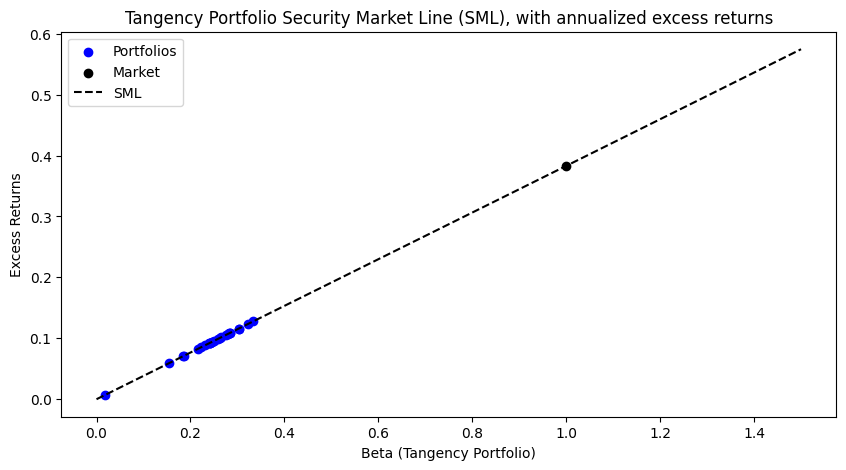

In [19]:
# Plot the Security Market Line (SML):

betas = tangent_ts_regression_summary['Beta (Tangency Portfolio)'] # Betas of the portfolios
excess_returns = capm_ts_regression_summary['Observed Mean'] *12 # Excess returns of the portfolios
tangent_portfolio_premium = (tangent_portfolio_returns.mean() * 12).values[0]

plt.figure(figsize=(10, 5))
plt.scatter(betas, excess_returns, label='Portfolios', color='blue')
plt.scatter(1, tangent_portfolio_premium, label='Market', color='black')

# plot a line going through the origin, the market point and extending to the right:
plt.plot([0, 1.5], [0, 1.5*tangent_portfolio_premium], color='black', linestyle='--', label='SML')

plt.xlabel('Beta (Tangency Portfolio)')
plt.ylabel('Excess Returns')
plt.legend()
plt.title('Tangency Portfolio Security Market Line (SML), with annualized excess returns')
plt.show()

<span style="color:red">__*Answer*__ </span>

Now, with the tangency portfolio, as expected:
- Alphas are equal to zero, which in turn makes the Information Ratio zero as well as the MAE, matching the SML perfectly.
- All Treynor Ratios are constant and equal to the expected excess return of the tangency portfolio.

This is exactly what we would expect to find if this model was valid.. However, this model is not valid because we used the expected excess return of the assets to construct the tangency portfolio, to then use it in a model to predict the expected excess return of the assets, which does not make sense doing in practice.


### 2. Fama-French 3-Factor Model

1. Re-run the analysis using the Fama-French 3-Factor Model.
   - **Findings:** Summarize your observations.

In [20]:
# Time-Series CAPM Regression Metrics: R^2, MAE, RSE, Alpha, Beta, p-values
ff3_ts_regression_summary = pm.calc_regression(Y=portfolios_returns,
                   X=factors_returns[['Mkt-RF', 'SMB', 'HML']],
                   intercept=True,
                   annual_factor=12,
                   tracking_error=False,
                   information_ratio=True)

ff3_ts_regression_summary.drop(columns=['Alpha', 'Information Ratio'], inplace=True)

# Calculate the Treynor Ratio:
ff3_ts_regression_summary = ff3_ts_regression_summary.assign(Annualized_Treynor_Ratio = ff3_ts_regression_summary['Observed Mean'] / ff3_ts_regression_summary['Beta (Mkt-RF)'] * 12)
display(ff3_ts_regression_summary)

,R-Squared,Observed Mean,Observed Std Dev,Annualized Alpha,P-Value (Alpha),Beta (Mkt-RF),P-Value (Mkt-RF),Beta (SMB),P-Value (SMB),Beta (HML),P-Value (HML),Annualized Information Ratio,Annualized_Treynor_Ratio
SMALL LoBM,0.8882,0.0006,0.0790,-0.0858,0.0000,1.1118,0.0000,1.3925,0.0000,-0.2538,0.0000,-0.9375,0.0060
ME1 BM2,0.9109,0.0074,0.0682,0.0014,0.8953,0.9655,0.0000,1.3177,0.0000,-0.0144,0.6213,0.0203,0.0919
ME1 BM3,0.9393,0.0077,0.0581,0.0006,0.9382,0.9231,0.0000,1.0651,0.0000,0.2774,0.0000,0.0120,0.0997
ME1 BM4,0.9403,0.0097,0.0561,0.0222,0.0026,0.8778,0.0000,1.0658,0.0000,0.4774,0.0000,0.4673,0.1321
SMALL HiBM,0.8763,0.0107,0.0606,0.0231,0.0440,0.9298,0.0000,1.0660,0.0000,0.6914,0.0000,0.3120,0.1375
ME2 BM1,0.9399,0.0049,0.0708,-0.0324,0.0005,1.1419,0.0000,1.0233,0.0000,-0.3103,0.0000,-0.5395,0.0516
ME2 BM2,0.9393,0.0084,0.0593,0.0072,0.3613,1.0138,0.0000,0.9159,0.0000,0.1213,0.0000,0.1412,0.0991
ME2 BM3,0.9208,0.0088,0.0536,0.0087,0.2846,0.9740,0.0000,0.7192,0.0000,0.3892,0.0000,0.1656,0.1088
ME2 BM4,0.9390,0.0091,0.0526,0.0084,0.2291,0.9413,0.0000,0.7483,0.0000,0.5751,0.0000,0.1861,0.1156
ME2 BM5,0.9536,0.0097,0.0622,-0.0058,0.4216,1.0892,0.0000,0.9298,0.0000,0.8328,0.0000,-0.1243,0.1065


In [21]:
# Calculate the Mean Absolute Error (MAE) of the Annualized Alpha:
mae = ff3_ts_regression_summary['Annualized Alpha'].abs().mean()
print(f'Mean Absolute Error (MAE) of the CAPM Annualized Alpha: {mae:.4f}')

Mean Absolute Error (MAE) of the CAPM Annualized Alpha: 0.0145


In [22]:
portfolio_betas_ff3 = ff3_ts_regression_summary[['Beta (Mkt-RF)', 'Beta (SMB)', 'Beta (HML)']] # Beta of the portfolios (25 data points)
port_annualized_mean_returns = portfolios_returns.mean() * 12 # Mean excess returns of the portfolios (25 data points)
cross_section_ff3_summary = pm.calc_cross_section_regression(Y=port_annualized_mean_returns,
                                 X=portfolio_betas_ff3,
                                 intercept=True,
                                 rse_mae=True,
                                 regression_name='Annualized Mean Returns ~ Beta (Mkt-RF), Beta (SMB), Beta (HML)')

display(cross_section_ff3_summary)

,"Annualized Mean Returns ~ Beta (Mkt-RF), Beta (SMB), Beta (HML)"
R-Squared,0.4628
Observed Mean,0.0939
Observed Std Dev,0.0244
MAE,0.0121
RSE,0.0191
Intercept,0.1865
P-Value (Intercept),0.0026
Lambda (Beta (Mkt-RF)),-0.1002
P-Value (Beta (Mkt-RF)),0.0690
Lambda (Beta (SMB)),-0.0019


,Tangency Portfolio
Mkt-RF,0.5249
SMB,-0.0114
HML,0.4865


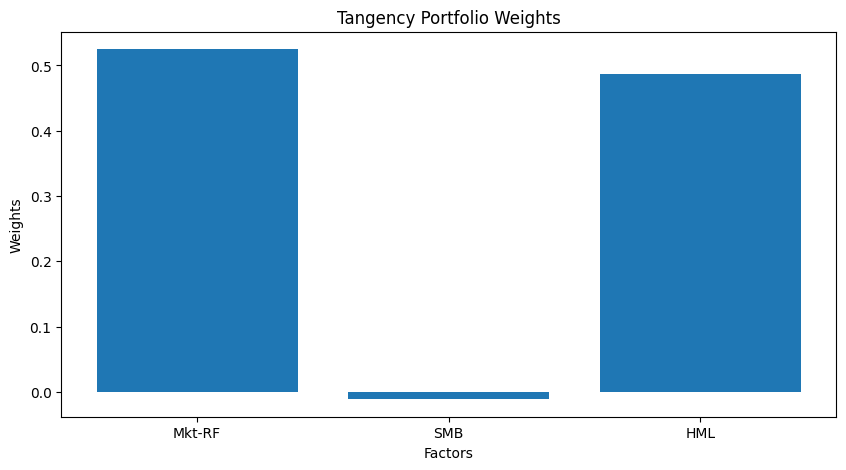

In [23]:
tangent_ff3_weights = pm.calc_tangency_port(factors_returns[['Mkt-RF', 'SMB', 'HML']], annual_factor=12)
display(tangent_ff3_weights)
plt.figure(figsize=(10, 5))
plt.bar(tangent_ff3_weights.index, tangent_ff3_weights.iloc[:, 0].values)
plt.xlabel("Factors")
plt.ylabel("Weights")
plt.title("Tangency Portfolio Weights")
plt.show()

In [24]:
# Summarizing previous answers:

columns = ["Expected", "CAPM Time-Series", "CAPM Cross-Section", "FF3 Time-Series", "FF3 Cross-Section"]
indexes = ["Intercept",
           "Annualized MAE", 
           "R-Squared",
           "Std Dev of Annualized Treynor Ratio"]

test_statistics = pd.DataFrame(index=indexes, columns=columns)

test_statistics.loc["Intercept", "Expected"] = 0
test_statistics.loc["Intercept", "CAPM Time-Series"] = "-"
test_statistics.loc["Intercept", "CAPM Cross-Section"] = cross_section_capm_summary.loc['Intercept'].values[0]
test_statistics.loc["Intercept", "FF3 Time-Series"] = "-"
test_statistics.loc["Intercept", "FF3 Cross-Section"] = cross_section_ff3_summary.loc['Intercept'].values[0]

test_statistics.loc["Annualized MAE", "Expected"] = 0
test_statistics.loc["Annualized MAE", "CAPM Time-Series"] = capm_ts_regression_summary['Annualized Alpha'].abs().mean()
test_statistics.loc["Annualized MAE", "CAPM Cross-Section"] = cross_section_capm_summary.loc['MAE'].values[0]
test_statistics.loc["Annualized MAE", "FF3 Time-Series"] = ff3_ts_regression_summary['Annualized Alpha'].abs().mean()
test_statistics.loc["Annualized MAE", "FF3 Cross-Section"] = cross_section_ff3_summary.loc['MAE'].values[0]

test_statistics.loc["R-Squared", "Expected"] = 1
test_statistics.loc["R-Squared", "CAPM Time-Series"] = "-"
test_statistics.loc["R-Squared", "CAPM Cross-Section"] = cross_section_capm_summary.loc['R-Squared'].values[0]
test_statistics.loc["R-Squared", "FF3 Time-Series"] = "-"
test_statistics.loc["R-Squared", "FF3 Cross-Section"] = cross_section_ff3_summary.loc['R-Squared'].values[0]

test_statistics.loc["Std Dev of Annualized Treynor Ratio", "Expected"] = 0
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "CAPM Time-Series"] = capm_ts_regression_summary['Annualized_Treynor_Ratio'].std()
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "CAPM Cross-Section"] = "-"
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "FF3 Time-Series"] = ff3_ts_regression_summary['Annualized_Treynor_Ratio'].std()
test_statistics.loc["Std Dev of Annualized Treynor Ratio", "FF3 Cross-Section"] = "-"

print("\n\nFama-French 3-Factor vs. CAPM Model Summary of the test statistics:\n")
display(test_statistics)



Fama-French 3-Factor vs. CAPM Model Summary of the test statistics:



,Expected,CAPM Time-Series,CAPM Cross-Section,FF3 Time-Series,FF3 Cross-Section
Intercept,0,-,0.2086,-,0.1865
Annualized MAE,0,0.0224,0.0147,0.0145,0.0121
R-Squared,1,-,0.3006,-,0.4628
Std Dev of Annualized Treynor Ratio,0,0.0257,-,0.0260,-


<span style="color:red">__*Answer*__ </span>

If the Fama-French Model were true, we would also expect:

- Alphas would also be equal to zero, which in turn would make the Information Ratio zero as well as the MAE, matching the SML perfectly.

- The Treynor Ratios would necessarily be constant.

As expected the Fama-French 3-factor model is not perfect, so it does not meet those conditions, but it is better than the CAPM model:
- The alphas are closer to zero.
- The R-squared of the cross-sectional regression is higher (0.45), the intercept is lower (0.0001), and the regression coefficient is closer to the expected market risk premium (0.0836), but they are not equal.

This can be seen in the tangency portfolio, which is constructed using the 3 factors, showing an almost equal weight on the market factor and value factor, which shows that the market factor alone does not represent the tangency portfolio even closely, supporting evidence that the CAPM model fails.

### 3. CAPM Hypothesis Test

1. **H-Statistic:** 
$$
H = T \left[ 1 + (\text{SR}_m)^2 \right]^{-1} \alpha' \Sigma_{\epsilon}^{-1} \alpha \sim \chi^2_n
$$

   - **Question:** Which test is stricter, H-statistic significance or individual alpha t-tests?
   - **Conceptual Question:** How does H relate to testing if \( r̃m \) spans the tangency portfolio?


<span style="color:red">__*Answer*__ </span>

- The $H$-statistic test significance is stricter than the individual's $\alpha$ t-tests:
    - By performing multiple t-tests simultaneously increases the likelyhood of finding at least one significant result purely by chances.
    - The H-test, on the other hand, combines all the t-tests into a single test accounting for the alphas joint distribution, reducing the probability of encountering a deviation from the CAPM model purely by chance.
    - This is reflected by our findings as well, wherein we most of the alphas are not are not significant on their own (evidence that CAPM holds) while the H statistic indicates CAPM does not hold.
- As mentioned previously, if the CAPM holds, then the market portfolio is the tangency portfolio. So, if the CAPM holds, there should be only once source of risk, with no additional alpha to contribute to the portfolio's return. The H-statistic tests if the market portfolio is the tangency portfolio, by testing if the alphas are zero.